<a href="https://colab.research.google.com/github/datasciencechampion/Zero-to-Hero-in-NLP-LLM-GenAI-AGI/blob/main/Prompt%20Engineering/Prompt_Engineering_Technique_Few_Shot_Prompting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prompt Engineering Technique : Few-Shot**

This module is part of [Zero-to-Hero in data Science](https://colab.research.google.com/drive/1EGLE0Lnst0CNmkw5BOFGSqIT5oxl5xYW?usp=sharing)

Author : [Pramod Singh](https://www.linkedin.com/in/pramod-singh-4635962/)

# Topic Covered
- [What is Few-Shot Prompting](#1)
- [Real World use cases for Few-Shot](#2)
  - [Legal Document Analysis](#3)
  - [Customer Support Automation](#4)
  - [Financial Report Summarization](#5)
  - [Medical Information Extraction](#6)
  - [Content Generation for Marketing](#7)
  - [Recipe Generation](#8)
  - [Sentiment Analysis with Context](#9)
  - [Translation with Cultural Nuances](#10)
  - [Personalized Email Responses](#11)
  - [Log Analysis](#12)
- [How to Fail Few-Shot Prompting](#13)
- [Overcoming Few-Shot Failures with Advanced Models](#14)
- [Conclusion](#15)


<a name='1'></a>
# What is Few-Shot Prompting

Few-shot prompting is a method used in natural language processing (NLP) where a language model is provided with a small number of examples (typically two to five or max 10) to perform a specific task. This technique is part of the broader category of learning methods that include zero-shot, one-shot, and few-shot learning. Few-shot prompting helps the model understand the task better by giving it several examples that illustrate how to perform the task, enabling it to generalize and produce more accurate and contextually appropriate responses.

## ✨ **Key Aspects of Few-Shot Prompting:**

**Multiple Examples:** The model is given a few (but not many) examples to learn from. This can range from two to five examples, although the exact number can vary depending on the task's complexity.

**Contextual Learning:** By seeing multiple examples, the model can pick up on patterns, formats, and nuances that help it understand the task more comprehensively.

**Improved Performance:** Few-shot prompting often leads to better performance compared to zero-shot or one-shot prompting, especially for complex tasks that require nuanced understanding.

**Flexibility:** It allows the model to adapt to a wide range of tasks with minimal additional training data, making it versatile and efficient for real-world applications.

## ✨ **Key Characteristics of Few-Shot Prompting**

Few-shot prompting involves providing the model with a few examples to perform a specific task. Here are the key characteristics that define this technique:

**Limited Examples:** Few-shot prompting provides the model with a small number of examples, typically between two and five. This is more than one-shot prompting but still relatively few compared to traditional supervised learning.

**Task-Specific Guidance:** The examples provided are specific to the task at hand. They illustrate the input-output pairs that help the model understand the desired outcome.

**Pattern Recognition:** By seeing multiple examples, the model can recognize patterns, structures, and commonalities in the task, which improves its ability to generalize to new inputs.

**Contextual Understanding:** Few-shot prompting gives the model enough context to understand complex instructions and nuanced tasks better than zero-shot or one-shot prompting.

**Versatility:** This technique can be applied to various tasks, including text classification, translation, summarization, question answering, and more.

## ✨ **How Few-Shot Prompting Works**

**Setting Up the Prompt:**

**Instruction:** Begin with a clear instruction or description of the task.

**Example:** Provide more than one , well-crafted example that demonstrates how to approach the task or solve the problem.

**Cue for Model:** End with a prompt that cues the model to generate a similar response based on the example provided.
Example Structure:

The example should be detailed enough to illustrate the necessary steps, format, or reasoning process.
Ensure clarity and precision to avoid any ambiguity that might lead to incorrect responses.



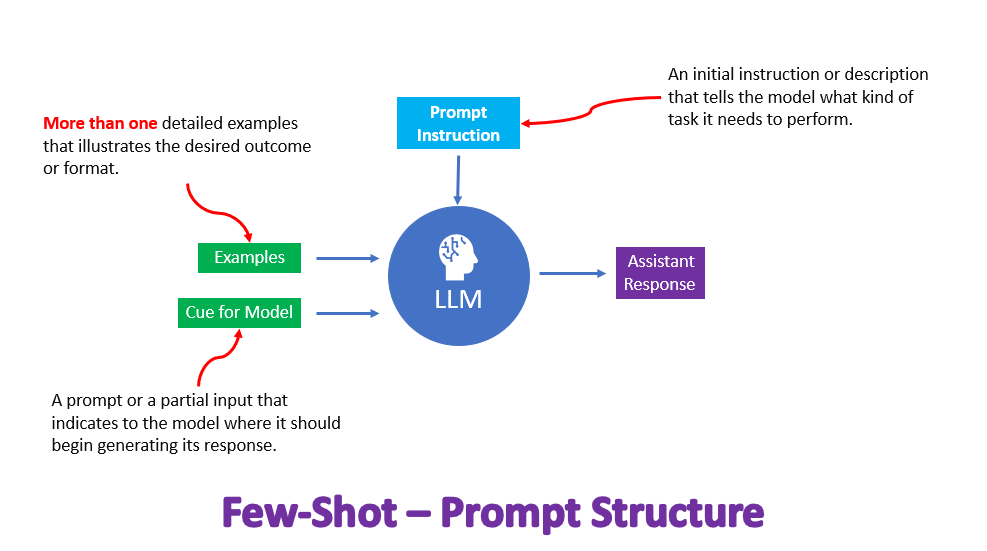

<a name='2'></a>
# Real-World Use Cases for Few-shot Prompting

Few-shot prompting can be highly effective in various real-world scenarios where tasks involve nuanced understanding, complex instructions, or varied formats. Here are some practical examples:

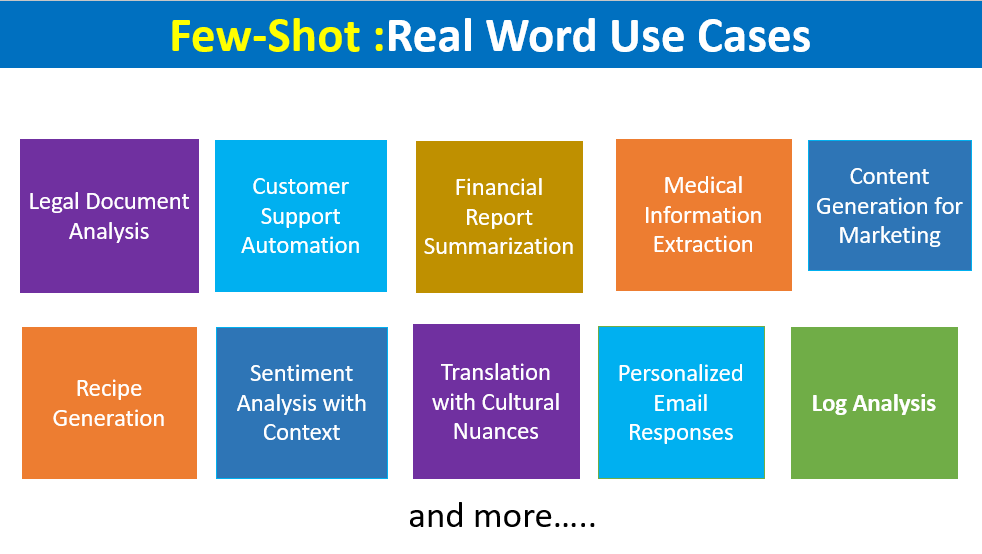

## Setup for OpenAI
#### Load the API key and relevant Python libaries.
In this course, we've provided some code that loads the OpenAI API key for you.

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


## Libraries - OpenAI

In [ ]:
import openai

In [ ]:
from google.colab import userdata
my_secret_key = userdata.get('OPENAI_API_KEY')
# Enter your OpenAI API key here:
client = openai.OpenAI(api_key = my_secret_key )

In [ ]:
#Helper function to call ChatCompletion API and get the model response.Here we are going to use "gpt-3.5-turbo" model and we are setting temperature=0
def get_response(messages, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        max_tokens=2000,
        temperature=0.2, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

<a name='3'></a>
##**🎯Legal Document Analysis**

Task/Use Case :Extract key clauses and information from legal contracts.

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a legal document analyzer.
Your task is to extract key clauses and information from legal contracts.

Here is an example for your reference

Example 1:
Contract: This Agreement is made on the 5th day of June 2023 between ABC Corp (the "Company") and John Doe (the "Consultant"). The Consultant agrees to provide consulting services in accordance with the terms and conditions set forth herein.
Key Clauses:
- Agreement Date: 5th June 2023
- Parties Involved: ABC Corp, John Doe
- Services: Consulting services

Example 2:
Contract: On this 1st day of January 2023, XYZ Inc (the "Employer") enters into this Employment Agreement with Jane Smith (the "Employee"). The Employee agrees to perform the duties of a software engineer as described in the job description.
Key Clauses:
- Agreement Date: 1st January 2023
- Parties Involved: XYZ Inc, Jane Smith
- Position: Software Engineer
"""
user_prompt="""
Contract: This Lease Agreement is made on the 15th day of March 2023 between Landlord LLC (the "Landlord") and Tenant LLC (the "Tenant"). The Tenant agrees to rent the premises located at 123 Main St for a term of 12 months.
Key Clauses:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Key Clauses:
- Agreement Date: 15th March 2023
- Parties Involved: Landlord LLC, Tenant LLC
- Premises: 123 Main St
- Term: 12 months


<a name='4'></a>
##**🎯Customer Support Automation**

Task/Use Case: Classify and respond to customer support tickets.

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a customer support assistant.
Your task is to classify and respond to customer support tickets.

Here is an example for your reference.

Example 1:
Ticket: My order #12345 was supposed to be delivered yesterday but I haven't received it yet.
Classification: Delivery Issue
Response: We apologize for the delay. Your order #12345 is on its way and should be delivered shortly.

Example 2:
Ticket: The product I received is damaged and not working. Can I get a replacement?
Classification: Product Issue
Response: We are sorry to hear about the damaged product. We will send a replacement for your order.

Example 3:
Ticket: I need to change the shipping address for my order #67890.
Classification: Shipping Address Change Request
Response: Thank you for reaching out. Please provide us with the updated shipping address for your order #67890, and we will make sure to update it for you.

"""
user_prompt="""
Ticket: I am unable to cancel my order #9819
Classification:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Classification: Order Cancellation Issue
Response: We apologize for the inconvenience. Please provide us with the details of your order #9819, and we will assist you in canceling it.


<a name='5'></a>
##**🎯Financial Report Summarization**

Task/Use Case: Summarize key points from financial reports.


In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a financial reporter.
Your task is to summarize key points from financial reports.

Example 1:
Report: ABC Corp reported a revenue of $10 million in Q1 2023, a 5% increase from Q1 2022. The net profit was $2 million, reflecting a 10% increase. The company plans to expand its operations in Europe.
Summary: ABC Corp reported $10 million in Q1 2023 revenue, a 5% increase. Net profit increased by 10% to $2 million. Plans to expand in Europe.

Example 2:
Report: XYZ Inc's Q2 2023 revenue was $15 million, a 3% decrease from Q2 2022. Net profit was $1.5 million, a 5% decrease. The company is cutting costs to improve margins.
Summary: XYZ Inc reported $15 million in Q2 2023 revenue, a 3% decrease. Net profit decreased by 5% to $1.5 million. Implementing cost-cutting measures.

Example 3:
Report: DEF Ltd's Q3 2023 revenue was $8 million, a 7% increase from Q3 2022. Net profit was $1 million, a 12% increase. The company is investing in new technology.
Summary:DEF Ltd reported $8 million in Q3 2023 revenue, a 7% increase from Q3 2022. Net profit increased by 12% to $1 million. The company is investing in new technology.

Example 4:
Report: XYZ Corp reported a revenue of $100 million in Q1 2024, a 15% increase from Q1 2023. The net profit was $28 million, reflecting a 10% increase. The company plans to expand its operations in Europe.
Summary: ABC Corp reported $100 million in Q1 2024 revenue, a 15% increase. Net profit increased by 10% to $2 million. Plans to expand in Europe.

Example 5:
Report: Hello Inc's Q2 2023 revenue was $50 million, a 13% decrease from Q2 2022. Net profit was $1.5 million, a 5% decrease. The company is cutting costs to improve margins.
Summary: XYZ Inc reported $15 million in Q2 2023 revenue, a 3% decrease. Net profit decreased by 5% to $1.5 million. Implementing cost-cutting measures.

"""
user_prompt="""
Report: MyTrip Ltd's Q3 2023 revenue was $8 million, a 7% increase from Q3 2022. Net profit was $1 million, a 12% increase. The company is investing in new technology.
Summary:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

MyTrip Ltd reported $8 million in Q3 2023 revenue, a 7% increase from Q3 2022. Net profit increased by 12% to $1 million. The company is investing in new technology.


<a name='6'></a>
##**🎯Medical Information Extraction**

Task/Use Case: Extract patient information from medical reports.

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a medical information extractor.
Your task is to extract patient information from medical reports.

Here is an example for your reference.

Example 1:
Report: Patient: John Doe, Age: 45, Diagnosis: Type 2 Diabetes, Medications: Metformin 500mg, Insulin 10 units daily, Symptoms: Increased thirst, frequent urination, fatigue.
Information: Patient: John Doe, Age: 45, Diagnosis: Type 2 Diabetes, Medications: Metformin 500mg, Insulin 10 units daily, Symptoms: Increased thirst, frequent urination, fatigue.

Example 2:
Report: Patient: Jane Smith, Age: 60, Diagnosis: Hypertension, Medications: Lisinopril 10mg daily, Symptoms: Headaches, dizziness.
Information: Patient: Jane Smith, Age: 60, Diagnosis: Hypertension, Medications: Lisinopril 10mg daily, Symptoms: Headaches, dizziness.

"""
user_prompt="""
Report: Patient: Robert Brown, Age: 50, Diagnosis: High Cholesterol, Medications: Atorvastatin 20mg daily, Symptoms: None.
Information:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

Patient: Robert Brown, Age: 50, Diagnosis: High Cholesterol, Medications: Atorvastatin 20mg daily, Symptoms: None.


<a name='7'></a>
##**🎯Content Generation for Marketing**

Task/Use Case: Generate engaging product descriptions for an e-commerce website.

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as content generation system for marketing.
Your task is to generate engaging product descriptions for the product.

Example 1:
Product: Wireless Bluetooth Headphones
Description: Experience high-quality sound with our Wireless Bluetooth Headphones. Featuring noise-cancellation and long-lasting battery life, these headphones are perfect for music lovers on the go. Enjoy seamless connectivity and comfortable design for an unparalleled listening experience.

Example 2:
Product: Smartwatch
Description: Stay connected and track your fitness with our Smartwatch. With a sleek design, heart rate monitor, and GPS tracking, this smartwatch is your ultimate companion for a healthy lifestyle. Receive notifications, monitor your activities, and achieve your fitness goals effortlessly.

Example 3:
Product: Portable Power Bank
Description:Never run out of battery again with our Portable Power Bank. This sleek and compact device is your ultimate solution for staying charged on the go. With fast charging capabilities and multiple ports, you can power up all your devices simultaneously. Don't let low battery slow you down - stay connected and powered up with our Portable Power Bank.
"""
user_prompt="""
Product: Smart goggles
Description:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

<a name='8'></a>
##**🎯Recipe Generation**

Task/Use Case: Generate a recipe given a set of ingredients.

In [ ]:
#Here through ststem prompt, we are setting the role for the language model.
system_prompt="""
You act as a recipe generation system.
Your task is to generate a recipe given the following ingredients.

Example 1:
Ingredients: chicken, garlic, lemon, olive oil, salt, pepper
Recipe: Garlic Lemon Chicken
1. Preheat the oven to 400°F (200°C).
2. In a bowl, mix olive oil, lemon juice, minced garlic, salt, and pepper.
3. Place the chicken in a baking dish and pour the mixture over it.
4. Bake for 25-30 minutes until the chicken is cooked through and golden brown.

Example 2:
Ingredients: pasta, tomatoes, basil, garlic, olive oil, parmesan cheese
Recipe: Tomato Basil Pasta
1. Cook the pasta according to package instructions.
2. In a pan, heat olive oil and sauté minced garlic until fragrant.
3. Add chopped tomatoes and cook until they soften.
4. Stir in fresh basil leaves, salt, and pepper.
5. Toss the cooked pasta with the tomato mixture.
6. Serve with grated parmesan cheese on top.
"""
user_prompt="""
Ingredients: eggs, milk, flour, sugar, butter, vanilla extract
Recipe:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

<a name='9'></a>
##**🎯Sentiment Analysis with Context**

Task/Use Case: Perform sentiment analysis on customer reviews and provide a summary of sentiments.

In [ ]:
system_prompt="""
You act as a sentiment analysis system.
Your task is to perform sentiment analysis on the customer reviews and provide a summary of sentiments.

Example 1:
Reviews:
1. "The product quality is excellent and it arrived on time."
2. "I am very disappointed with the service. It took too long to arrive."
3. "Great value for money. Highly recommend!"
4. "Not worth the price. The item broke after one use."

Summary:
Positive: 2
Negative: 2

Example 2:
Reviews:
1. "Amazing experience! Will definitely buy again."
2. "The product did not meet my expectations."
3. "Fast shipping and excellent customer service."
4. "The packaging was poor and the product was damaged."

Summary:
Positive: 2
Negative: 2
"""
user_prompt="""
Reviews:
1. "Loved the product! Exactly as described."
2. "The item was faulty and customer service was unhelpful."
3. "Very satisfied with my purchase."
4. "Terrible quality. Would not recommend."
5. "Excellent! Exceeded my expectations."

Summary:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

<a name='10'></a>
##**🎯Translation with Cultural Nuances**

Task/Use Case:  Translate text from English to Spanish while preserving cultural nuances.

In [ ]:
system_prompt="""
You act as a language translator.
Your task is to translate the English text to Spanish, preserving cultural nuances.

Example 1:
English: "Let's grab a coffee and catch up."
Spanish: "Vamos a tomar un café y ponernos al día."

Example 2:
English: "Congratulations on your promotion! You deserve it."
Spanish: "¡Felicidades por tu ascenso! Te lo mereces."

Example 3:
English: "I'll bring some snacks to the party."
Spanish: "Llevaré algunos aperitivos a la fiesta."
"""
user_prompt="""
English: "Please keep me posted about the project."
Spanish:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

<a name='11'></a>
##**🎯Personalized Email Responses**

Task/Use Case:Generate personalized email responses based on the context of the received emails.

In [ ]:
system_prompt="""
You act as a personalize email respondent system.
Your task is to generate personalized email responses based on the context of the received emails.

Example 1:
Received Email: "Hi, I have a question about my recent order #4567. I received the wrong item. Can you help me with this?"
Response: "Dear Customer, I'm sorry to hear that you received the wrong item in your order #4567. Please provide us with a photo of the received item, and we will arrange for a replacement or refund as soon as possible. Thank you for your patience."

Example 2:
Received Email: "Hello, I am interested in learning more about your product offerings. Can you send me a catalog?"
Response: "Dear Customer, Thank you for your interest in our products. Please find the attached catalog with detailed information about our offerings. Feel free to reach out if you have any further questions."
"""
user_prompt="""
Received Email: "Good morning, I need to reschedule my appointment scheduled for tomorrow. Can you help me with this?"
Response:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

<a name='12'></a>
##**🎯Log Analysis**

Task/Use Case:Extract and summarize key information from system log files to identify and describe errors.

In [ ]:
system_prompt="""
You act as a log analyzer system.
Your task is to extract and summarize key information from the following system log files to identify and describe errors.

Example 1:
Log:
2024-06-01 12:00:00 [INFO] Starting backup process...
2024-06-01 12:05:00 [ERROR] Backup failed: Disk full
2024-06-01 12:10:00 [INFO] Retrying backup...
2024-06-01 12:15:00 [ERROR] Backup failed: Disk full

Summary:
Error: Backup failed
Cause: Disk full
Occurrences: 2
First Occurrence: 2024-06-01 12:05:00
Last Occurrence: 2024-06-01 12:15:00

Example 2:
Log:
2024-06-02 09:00:00 [INFO] User login attempt: user1
2024-06-02 09:05:00 [ERROR] User login failed: Incorrect password
2024-06-02 09:10:00 [INFO] User login attempt: user1
2024-06-02 09:15:00 [ERROR] User login failed: Incorrect password
2024-06-02 09:20:00 [INFO] User login attempt: user2
2024-06-02 09:25:00 [INFO] User login successful: user2

Summary:
Error: User login failed
Cause: Incorrect password
Occurrences: 2
First Occurrence: 2024-06-02 09:05:00
Last Occurrence: 2024-06-02 09:15:00
"""
user_prompt="""
Log:
2024-06-03 14:00:00 [INFO] Starting data sync...
2024-06-03 14:05:00 [ERROR] Data sync failed: Network timeout
2024-06-03 14:10:00 [INFO] Retrying data sync...
2024-06-03 14:15:00 [ERROR] Data sync failed: Network timeout
2024-06-03 14:20:00 [INFO] Retrying data sync...
2024-06-03 14:25:00 [INFO] Data sync completed

Summary:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

<a name='13'></a>
# How to Fail Few-Shot Prompting
While few-shot prompting is a powerful technique for guiding language models to perform specific tasks, it can sometimes fail, especially with models that might not be sophisticated enough to understand or generalize from the provided examples. This section explores an example where few-shot prompting with GPT-3.5 Turbo fails to achieve the desired result, and highlights the need for more advanced models like GPT-4 Turbo.

## Example Task: Reverse the Word "lollipop"

### Zero-shot

In [ ]:
system_prompt="""
reverse this word "lollipop"
"""
user_prompt="""
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

poppilol


### One-Shot

In [ ]:
system_prompt="""
Your task is to reverse the word.

Example:
Reverse this word "tiptop"

Reversed word:
potpit
"""

user_prompt="""
Reverse this word "lollipop"

Reversed word:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

poppilol


### Few-Shot

In [ ]:
system_prompt="""
Your task is to reverse the word.

Example1:
Reverse this word "tiptop"

Reversed word:
potpit

Example2:
Reverse this word "kingkong"

Reversed word:
gnokgnik

Example3:
Reverse this word "kitkat"

Reversed word:
taktik
"""

user_prompt="""
Reverse this word "lollipop"

Reversed word:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

poppilol


#### Lets add more examples in few-shot

In [ ]:
system_prompt="""
Your task is to reverse the word.

Example1:
Reverse this word "tiptop"

Reversed word:
potpit

Example2:
Reverse this word "kingkong"

Reversed word:
gnokgnik

Example3:
Reverse this word "kitkat"

Reversed word:
taktik

Example4:
Reverse this word "Pramod"

Reversed word:
domarp

Example5:
Reverse this word "zimzam"

Reversed word:
mazmiz
"""

user_prompt="""
Reverse this word "lollipop"

Reversed word:
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

poppillol


### Lets try Few-shot with different Prompt

In [ ]:
system_prompt="""
Your task is to reverse the word.

Example1:
"tiptop"=>"potpit"
Example2:
"kingkong"=>"gnokgnik"
Example3:
"kitkat"=>"taktik"
Example4:
"Pramod"=>"domarp"
Example5:
"zimzam"=>"mazmiz"
Example6:
"king"=>"gnik"
Example7:
"India"=>"aidni"
Example8:
"kind"=>"dnik"
Example9:
"love"=>"evol"
Example10:
"hate"=>"etah"
"""

user_prompt="""
"lollipop"=>
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

"poppilol"


### Explanation
#### Why Did Few-Shot Prompting Fail?

**Model Limitations:** GPT-3.5 Turbo may lack the capacity to correctly generalize the task from the provided examples.

**Complexity of Generalization:** The task of reversing a word might seem straightforward, but the model's ability to understand and apply the pattern consistently may be limited by its architecture and training data.

✨ **When Few-Shot Prompting Works and Fails:**

Few-shot prompting works well for tasks where the pattern is simple and easily generalizable.
It can fail when the task requires a deeper understanding or more sophisticated pattern recognition than the model can provide.

<a name='14'></a>
# Overcoming Few-Shot Failures with Advanced Models

### Using GPT-4 Turbo

In contrast to GPT-3.5 Turbo, GPT-4 Turbo can often handle such tasks more effectively, even with zero-shot prompting.

In [ ]:
#Helper function to call ChatCompletion API and get the model response.Here we are going to use "gpt-4-turbo" model and we are setting temperature=0
def get_response(messages, model="gpt-4-turbo"):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        max_tokens=2000,
        temperature=0.2, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

### Zero-Shot Prompt with GPT-4 Turbo:

In [ ]:
system_prompt="""
reverse this word "lollipop"
"""
user_prompt="""
"""

In [ ]:
messages = []
messages.append({"role": "system", "content": f"{system_prompt}"})
messages.append({"role": "user", "content": f"{user_prompt}"})
response = get_response(messages)
print(response)

popillol


## Why GPT-4 Turbo Succeeds:

**Enhanced Understanding:** GPT-4 Turbo has a more advanced architecture, enabling it to understand and generalize patterns more effectively.

**Improved Training Data:** The model has been trained on a larger and more diverse dataset, enhancing its ability to handle a wide range of tasks.

<a name='14'></a>
# Conclusion
Few-shot prompting is an effective technique in natural language processing that improves a model's performance by providing it with a small number of examples to learn from. This method is particularly useful for complex tasks requiring nuanced understanding, as it allows the model to recognize patterns and generalize from the provided examples. By understanding the key characteristics and working mechanisms of few-shot prompting, one can effectively leverage language models for a wide range of real-world applications.

However, but it has its **limitations.** When few-shot prompting with models like GPT-3.5 Turbo fails, more advanced models like GPT-4 Turbo can often succeed, even with minimal or zero-shot prompting. Understanding these limitations and knowing when to leverage more powerful models is crucial for effective prompt engineering.

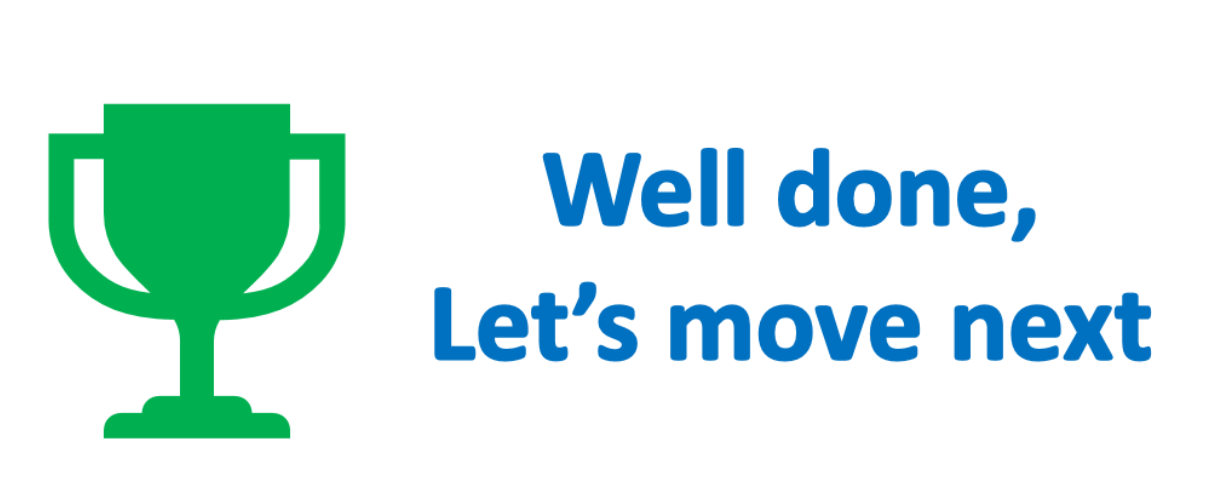